In [97]:
import pandas as pd
import numpy as np
from math import sqrt
import os
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

In [90]:
df_titan= pd.read_csv("Titan.csv")

##Question 1:- find the mean of old scheme and new scheme column.

In [91]:
μ1= df_titan['Old Scheme (in thousands)'].mean()
print(μ1)

68033.33333333333


In [92]:
μ2= df_titan['New Scheme (in thousands)'].mean()
print(μ2)

72033.33333333333


# Check for Normality of the Differnce

In [93]:
df_titan['diff_schemes']=df_titan['New Scheme (in thousands)']-df_titan['Old Scheme (in thousands)']

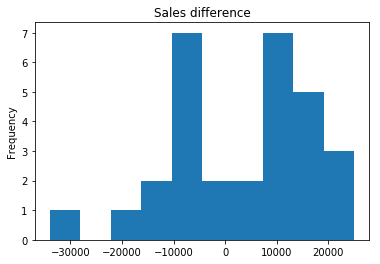

In [94]:
df_titan['diff_schemes'].plot(kind='hist', title= 'Sales difference')

In [95]:
from scipy.stats import shapiro
stats,pv=shapiro(df_titan['diff_schemes'])
print("P value is :-",pv)

P value is :- 0.08894602954387665


# Since p value > 0.05 (that is alpha), we can accept that the Difference in the Sales value is normally distributed.

##Quesion 2:- Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs?

In [98]:
##Assumptions are :-
## Null Hypothesis-       New Scheme has not changed sale. μ2 – μ1 = 0 
## Alternate Hypothesis:- New Scheme has changed the sales significantly. μ2 – μ1 > 0
##μ1 = Average sums assured by salesperson before changeover. μ2 = Average sums assured by salesperson after changeover.

N = len(df_titan['Old Scheme (in thousands)']) #this is the sample size 
df = N-1
alpha=0.05            ##significance level
tstats,pval = stats.ttest_rel(df_titan['Old Scheme (in thousands)'], df_titan['New Scheme (in thousands)'])
oneTailed_pval=pval/2
print("P value for one tailed t test is:- ",oneTailed_pval)
print("Value of t statistics:-",tstats)


P value for one tailed t test is:-  0.06528776980668831
Value of t statistics:- -1.5559143823544377


In [99]:
if oneTailed_pval<0.05:
    print("Reject null hypothesis. Accept Alternate New Scheme has changed the sales significantly")
else:
    print("Fail to reject null hypothesis. New Scheme has might not changed sale.")

Fail to reject null hypothesis. New Scheme has might not changed sale.


# Ques 3:- What conclusion does the test (p-value) lead to?

In [100]:
print("The p-value for one tail, that is , the assumpttion that there is a significant increase of output with new scheme, is 0.065. P value is more than the decided threshold(5%). Hence, we may reject the hypothesis that the new scheme has increased output significantly.") 

The p-value for one tail, that is , the assumpttion that there is a significant increase of output with new scheme, is 0.065. P value is more than the decided threshold(5%). Hence, we may reject the hypothesis that the new scheme has increased output significantly.


##Ques 4:- Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:
        ##a) The probability of a type 1 error? 

        ##b) What is the p- value of the hypothesis test if we test for a difference of $5000? 

        ##c) Power of the test

In [101]:
##a) The probability of a type 1 error?
print("When the null hypothesis is true and you reject it, you make a type I error. The probability of making a type I error is α= 0.05.")

When the null hypothesis is true and you reject it, you make a type I error. The probability of making a type I error is α= 0.05.


In [102]:
##b) What is the p- value of the hypothesis test if we test for a difference of $5000?

In [103]:
## Null Hypothesis, H0:-       Average sums assured by salesperson before changeover did not chnaged by £5000. μ2-μ1 <= £5000
## Alternate Hypothesis, H1 :- Average sums assured by salesperson after changeover. μ2-μ1 > £5000
from scipy.stats import ttest_1samp 
mean_of_diff=df_titan['diff_schemes'].mean()
print("Mean of Difference in sales is:-",mean_of_diff)
std_diff=df_titan['diff_schemes'].std()
print(std_diff)
diff_of_sales_se = std_diff/sqrt(30)
tstat = ( mean_of_diff- 5000)/diff_of_sales_se
print("Value of t stats",tstat)
p_value = 1- stats.t.cdf(tstat, df=29)
#t_statistics,p_value= ttest_1samp(df_titan['diff_schemes'],0)
print("P value is ",p_value)
#print(t_statistics)

Mean of Difference in sales is:- 4000.0
14081.046199376151
Value of t stats -0.38897859558860937
P value is  0.6499332543693357


In [104]:
##c Power of the test 

In [105]:
p = 1- alpha
value = stats.t.ppf(p, df)
print('Critical Value of T is',value)

Critical Value of T is 1.6991270265334972


In [106]:
μ0 = 0
μd = 5000
SE = statistics.stdev(df_titan['diff_schemes'])/sqrt(N)
xbar = μ0 + value*SE
print(xbar)
t_stat = (xbar-μd)/SE
print(t_stat)
p_value =1- (stats.t.cdf(t_stat,df=df))
beta= 1-p_value
print('Power of Test is',beta)

4368.176156228719
-0.2457659514095497
Power of Test is 0.40379725247943166
